importing libraries and locating data table PATH

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
!cd ../../
!pwd


/Users/stephen/Flatiron/Phase2/Project2/notebooks/Stephen


In [168]:
df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


creating new dataframe with only my responsible columns

In [169]:
my_df = df[['price', 'condition', 'waterfront', 'zipcode', 'lat', 'long']]


In [170]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       21597 non-null  float64
 1   condition   21597 non-null  object 
 2   waterfront  19221 non-null  object 
 3   zipcode     21597 non-null  int64  
 4   lat         21597 non-null  float64
 5   long        21597 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1012.5+ KB


Checking Null values

In [171]:
my_df.isna().sum()

price            0
condition        0
waterfront    2376
zipcode          0
lat              0
long             0
dtype: int64

In [172]:
my_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

replacing Null values withb 'N/A'

In [173]:
my_df['waterfront'] = my_df['waterfront'].fillna('N/A')

<ipython-input-173-490998c40b2f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
my_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [175]:
my_df['waterfront'].value_counts()

NO     19075
N/A     2376
YES      146
Name: waterfront, dtype: int64

In [176]:
my_df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

Plotting to see what the data looks like 


In [177]:
my_df.describe()

,price,zipcode,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,98077.951845,47.560093,-122.213982
std,3.673681e+05,53.513072,0.138552,0.140724
min,7.800000e+04,98001.000000,47.155900,-122.519000
25%,3.220000e+05,98033.000000,47.471100,-122.328000
50%,4.500000e+05,98065.000000,47.571800,-122.231000
75%,6.450000e+05,98118.000000,47.678000,-122.125000
max,7.700000e+06,98199.000000,47.777600,-121.315000


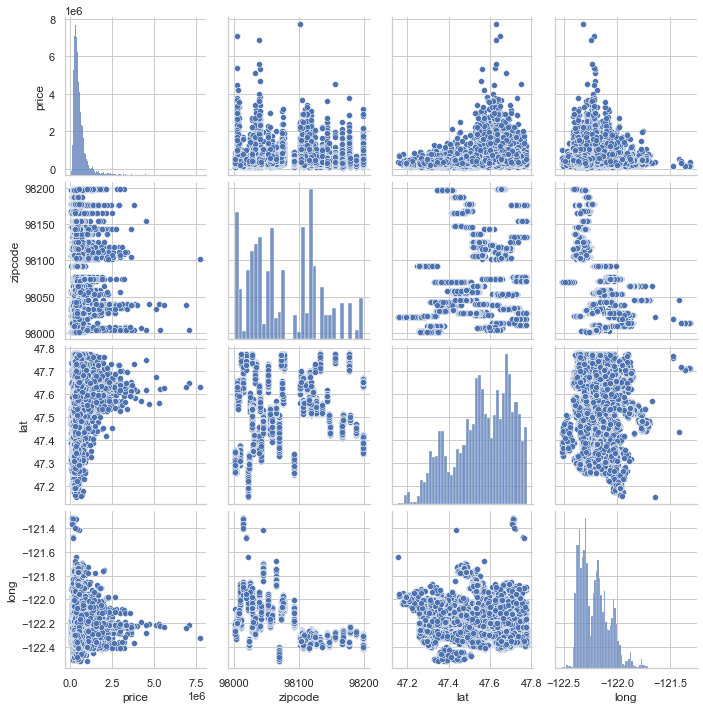

In [178]:
sns.pairplot(my_df)

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

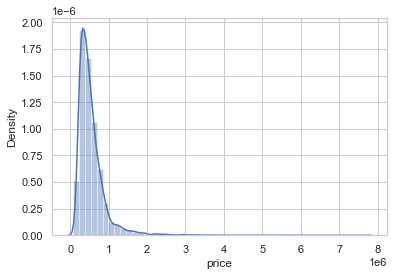

In [179]:
sns.distplot(a=my_df['price'], hist=True, kde=True, rug=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

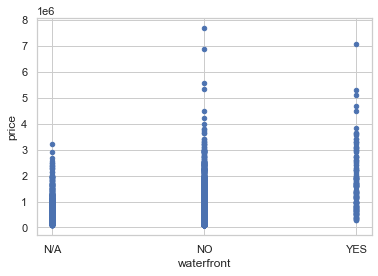

In [180]:
my_df.plot(kind='scatter', x='waterfront', y='price')

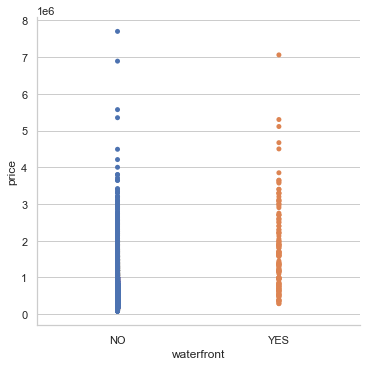

In [181]:
sns.catplot(x='waterfront',y='price',jitter = False, data=df)

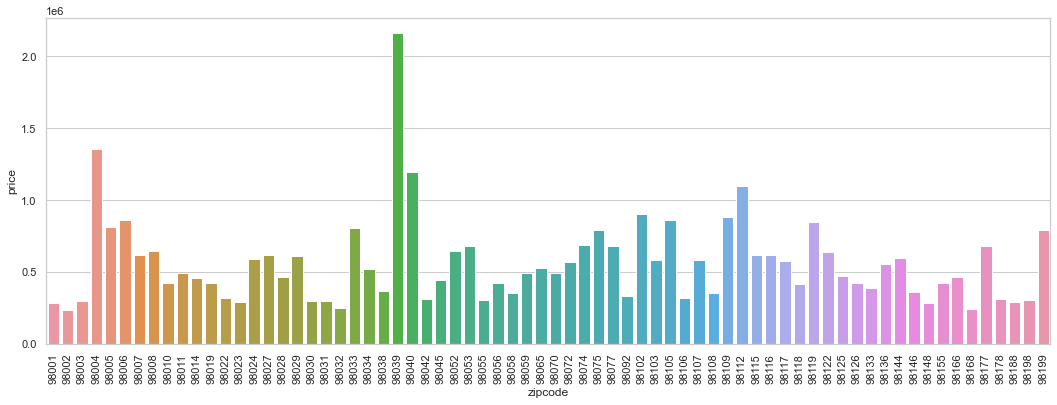

In [182]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='zipcode',y='price', ci = False, data=df)
plt.xticks(rotation=90);

In [183]:
my_df.groupby('zipcode')['price'].max()

zipcode
98001     850000.0
98002     389000.0
98003     950000.0
98004    7060000.0
98005    1960000.0
           ...    
98177    3800000.0
98178    1700000.0
98188     707000.0
98198    1350000.0
98199    3200000.0
Name: price, Length: 70, dtype: float64

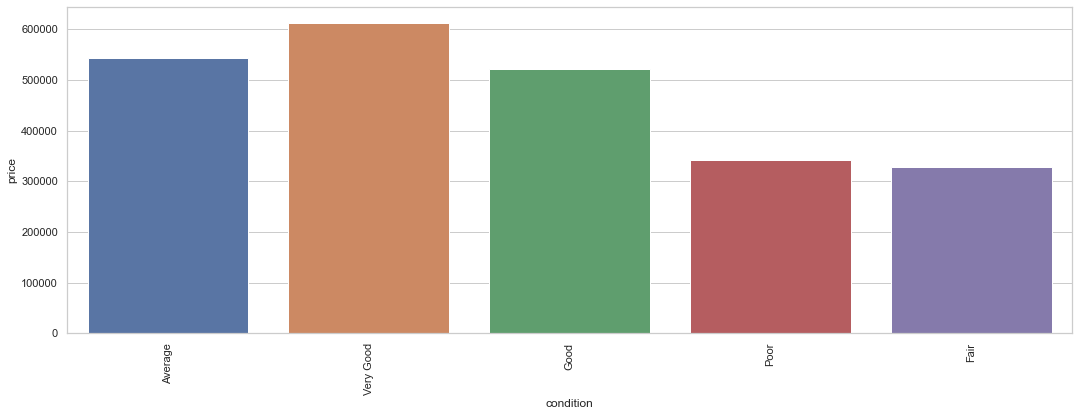

In [184]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='condition',y='price', ci = False, data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='condition', ylabel='zipcode'>

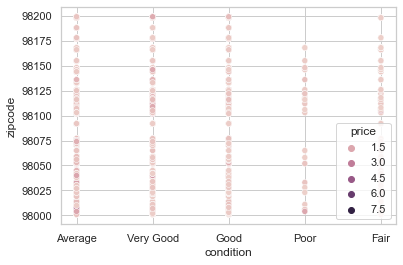

In [185]:
sns.scatterplot(x='condition',y='zipcode', hue='price', data=my_df)

plotting on a geomap


In [186]:
BBox = (df.long.min(), df.long.max(), df.lat.min(), df.lat.max())
        
print(BBox)

(-122.519, -121.315, 47.1559, 47.7776)


In [187]:
king_county_map = plt.imread('/Users/stephen/Flatiron/Phase2/Project2/visuals/king_county_map.png')

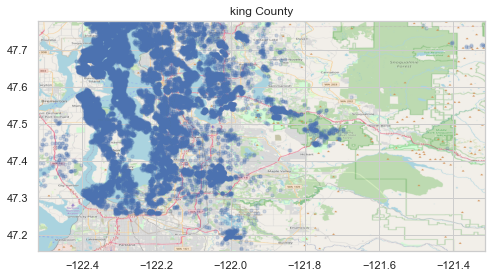

In [188]:
fig , ax = plt.subplots(figsize = (8,7))

ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_title('king County')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(king_county_map, zorder=0, extent = BBox, aspect= 'equal')

In [189]:
filt_df = my_df.loc[df['price'] < 1000000]

In [190]:
fig = px.scatter_mapbox(filt_df,
                        lat='lat',
                        lon='long',
                        color='price',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [191]:
df = df[df['view'].notna()]

In [192]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

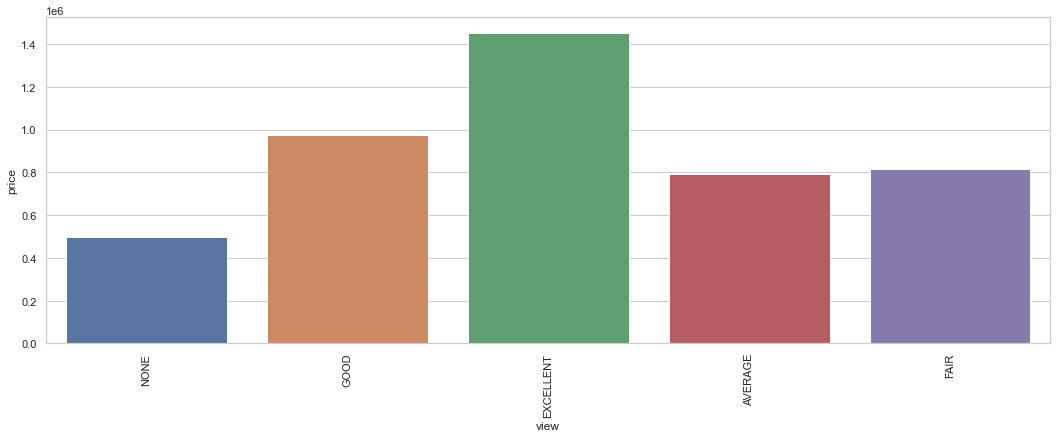

In [193]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='view',y='price', ci = False, data=df)
plt.xticks(rotation=90);

In [194]:
# showing different view 

fig = px.scatter_mapbox(df,
                        lat='lat',
                        lon='long',
                        color='view',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [195]:
# showing different view 

fig = px.scatter_mapbox(my_df,
                        lat='lat',
                        lon='long',
                        color='waterfront',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

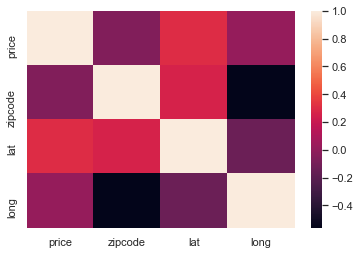

In [196]:
sns.heatmap(my_df.corr());

In [197]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       21597 non-null  float64
 1   condition   21597 non-null  object 
 2   waterfront  21597 non-null  object 
 3   zipcode     21597 non-null  int64  
 4   lat         21597 non-null  float64
 5   long        21597 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1012.5+ KB


In [198]:
my_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [199]:
my_df['condition'].describe()

count       21597
unique          5
top       Average
freq        14020
Name: condition, dtype: object

In [200]:
my_df['condition'] = my_df['condition'].astype('category')
my_df['condition'].cat.codes


<ipython-input-200-d7bdbd83fe8b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        0
1        0
2        0
3        4
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Length: 21597, dtype: int8

In [201]:
my_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [202]:
my_df['waterfront'] = my_df['waterfront'].astype('category')
my_df['waterfront'].cat.codes

<ipython-input-202-b66ecc8e947d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        0
1        1
2        1
3        1
4        1
        ..
21592    1
21593    1
21594    1
21595    0
21596    1
Length: 21597, dtype: int8

In [203]:
my_df['waterfront'].value_counts()

NO     19075
N/A     2376
YES      146
Name: waterfront, dtype: int64

In [204]:
my_df.head()

,price,condition,waterfront,zipcode,lat,long
0,221900.0,Average,N/A,98178,47.5112,-122.257
1,538000.0,Average,NO,98125,47.7210,-122.319
2,180000.0,Average,NO,98028,47.7379,-122.233
3,604000.0,Very Good,NO,98136,47.5208,-122.393
4,510000.0,Average,NO,98074,47.6168,-122.045
